In [78]:
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
csv_path = Path(
    "/home/shinsei/MyResearches/feat_extrc/reports/features/SimpleCAE16/2023-11-27/12-07-16/feature_check_data_clustering_VBGMM_iter500.csv"
)
df = pl.read_csv(csv_path)
std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(df.select(df.columns[:128]).to_numpy())
pca = PCA()
data_pca = pca.fit_transform(data_std)

In [3]:
df.head()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_95,column_96,column_97,column_98,column_99,column_100,column_101,column_102,column_103,column_104,column_105,column_106,column_107,column_108,column_109,column_110,column_111,column_112,column_113,column_114,column_115,column_116,column_117,column_118,column_119,column_120,column_121,column_122,column_123,column_124,column_125,column_126,column_127,dirname,filename,filepath,cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
1.72453,1.312374,0.578949,0.642562,0.266005,0.845199,0.006833,0.233256,-0.611282,0.148161,1.309538,0.686614,0.128154,-0.074017,0.242344,0.535129,0.233373,0.588786,-0.498361,0.567579,0.004328,1.135404,0.12,0.166056,0.599593,0.204078,0.097217,0.497724,1.328455,-0.673673,-0.787069,0.720474,-0.862186,0.50474,-0.378087,0.332222,0.05079,…,-0.218932,0.437417,-0.699007,0.211102,0.050383,-0.350117,0.57309,-0.329715,0.26047,0.013734,1.305088,1.752051,-1.058746,0.476623,0.267411,0.313768,-0.980034,-0.029416,0.322119,-0.104777,-1.068021,0.469012,0.748355,0.364889,0.323628,-0.014226,0.90518,0.505424,0.083288,1.032181,0.364738,1.165318,-0.670811,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",2
-0.210977,-0.956799,0.132525,0.914722,0.320664,0.397369,0.573464,0.089742,0.188766,-0.682917,0.233204,0.778643,0.410894,0.327856,-0.153537,0.394559,0.327695,-0.647058,0.200352,-0.235146,0.708703,-0.509461,1.290476,0.56619,-0.330108,-0.27881,-0.328639,0.075292,0.481648,-0.301828,-0.601588,-0.318866,0.121789,0.505337,-0.63871,0.710059,0.131394,…,0.805381,-0.819711,-0.46452,-0.552826,0.171647,-0.537494,-0.23775,-0.481693,0.741757,0.3614,0.521063,0.228482,0.169597,0.116162,-0.672992,-0.057086,-0.474109,-1.139381,0.543333,-0.455716,0.970334,-0.607103,0.300801,0.000899,0.162805,0.198389,0.655255,0.403495,0.073392,0.975975,0.146082,0.201944,-0.642938,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",3
0.210469,-0.116422,1.502555,0.549519,0.291489,0.71969,0.409162,0.451551,0.431348,-0.096558,0.465862,-0.158419,0.360008,0.344303,0.942211,-0.414952,1.154066,-0.231067,-0.284933,0.4374,-1.124906,0.147444,0.036134,0.590282,-0.505142,0.039522,1.202969,0.065821,0.533352,0.86632,-0.761916,0.620556,-0.031603,0.827434,0.157284,0.530879,-0.460462,…,1.212101,-0.878975,0.381363,-0.269465,0.668731,-0.248364,0.047772,1.083636,0.707294,-1.300982,-0.034657,0.930267,0.277924,0.577499,-0.240176,-0.001479,0.050046,0.359704,0.14706,0.440281,0.319309,-0.483752,0.570219,1.002324,0.335394,0.041078,0.275887,-0.394001,-0.05168,0.230856,0.780127,0.052732,-0.187319,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
0.548759,0.055031,0.830993,0.063254,0.196274,-0.394956,0.663828,0.975064,1.194436,-0.342279,1.251295,-0.257328,0.427628,0.351405,0.130855,0.11366,0.759887,-0.020455,0.291459,-0.927433,0.558452,-0.919667,0.107999,0.215596,-0.64996,1.012843,-0.834727,0.535153,-0.421523,0.50739,-0.090645,0.141474,-0.575469,-0.031216,-0.196591,-0.064132,0.146435,…,0.406879,-0.739435,0.678945,0.798024,1.173802,-0.146309,0.639016,0.133861,0.552442,-0.520305,-0.651931,0.090858,0.776281,-0.124286,0.486899,-0.116668,0.345244,-0.254114,-0.178073,0.891752,-0.291047,0.001797,0.323626,0.888681,1.551863,-0.371692,-0.091884,-0.523028,-0.512484,-0.82578,1.166906,0.602186,0.340603,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",3
-0.479433,0.480449,0.231798,0.541986,0.449486,1.084231,0.469275,-0.839086,0.622239,-0.737326,-0.56143,-0.041328,-0.240316,0.179496,0.106154,-1.483094,-0.581757,0.434954,0.82303

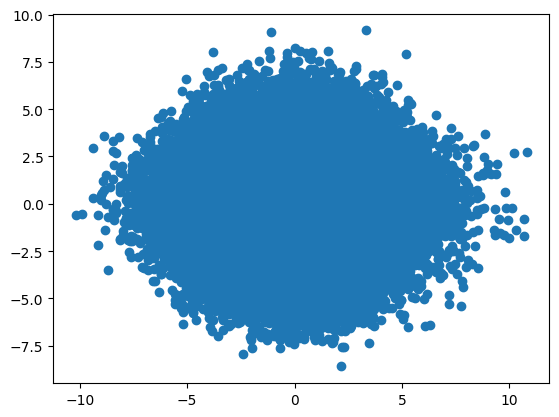

In [4]:
plt.scatter(
    data_pca[:, 0],
    data_pca[:, 1],
)

In [5]:
df_pc12 = pl.DataFrame(
    {
        "PC1": data_pca[:, 0],
        "PC2": data_pca[:, 1],
    }
)

df_pca_a = pl.concat(
    [df_pc12, df.select(["filepath", "cluster"])], how="horizontal"
)
df_pca_a.head()

PC1,PC2,filepath,cluster
f64,f64,str,i64
4.083316,0.365618,"""0/10k_0_h000_w…",2
-0.548032,-0.001868,"""0/10k_0_h000_w…",3
-0.043972,-1.80433,"""0/10k_0_h000_w…",9
-1.268117,-0.036326,"""0/10k_0_h000_w…",3
-0.528122,1.599717,"""0/10k_0_h000_w…",8


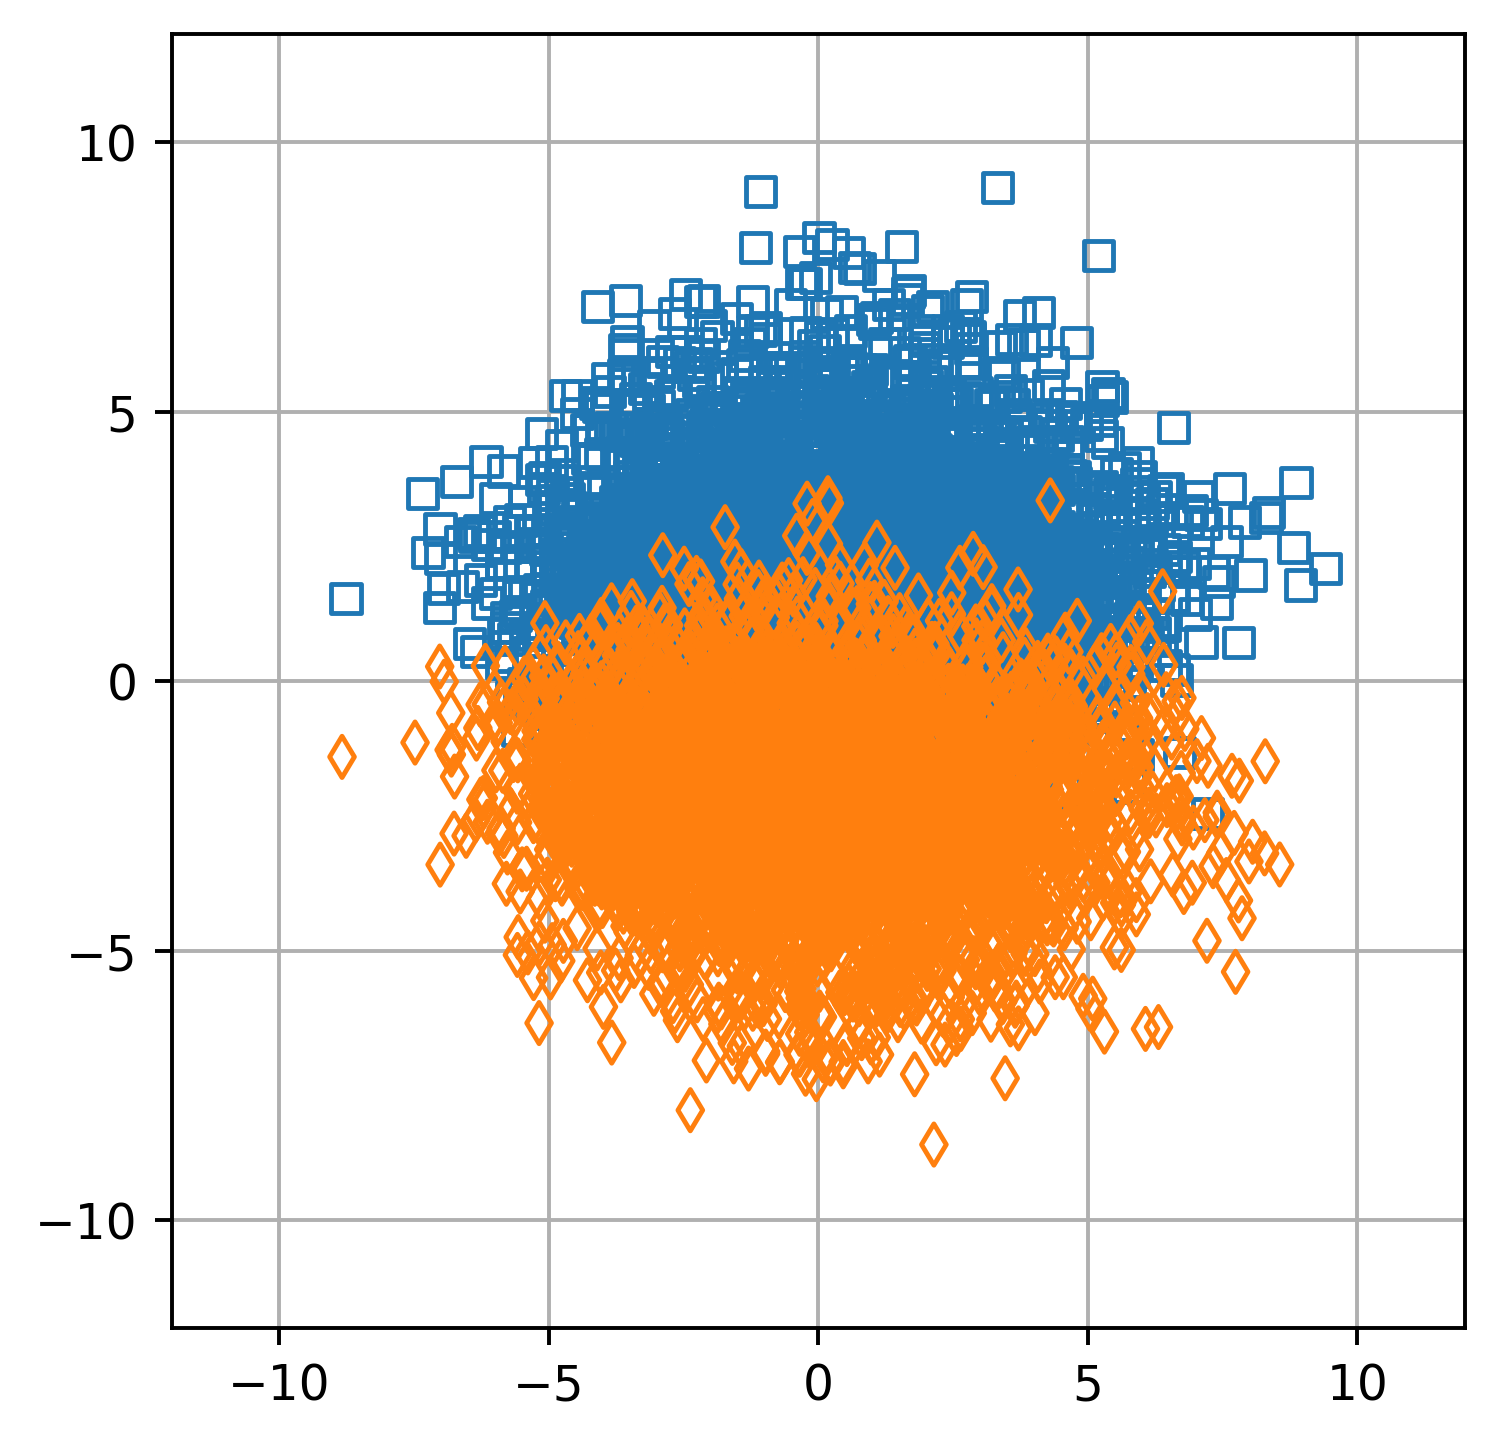

In [6]:
# clusters = np.unique(df_pca_a.select("cluster"))
clusters = [0, 1]
markers = ["s", "d"]
colors = ["tab:blue", "tab:orange"]
fig = plt.figure(dpi=350)
ax = fig.add_subplot(1, 1, 1)

for c in clusters:
    _df = df_pca_a.filter(pl.col("cluster") == c)
    ax.scatter(
        _df.select("PC1"),
        _df.select("PC2"),
        marker=markers[c],
        facecolor="none",
        edgecolors=colors[c],
    )

ax.grid(True, which="major")
ax.set_axisbelow(True)
ax.set_xlim(-12, 12)
ax.set_ylim(-12, 12)
ax.set_aspect("equal", "box")

In [7]:
df_0onPC1 = df_pca_a.filter(
    ((pl.col("cluster") == 0) | (pl.col("cluster") == 1))
    & (pl.col("PC1") > -1e-0)
    & (pl.col("PC1") < 1e-0)
).sort(pl.col("PC2"))
df_0onPC1

PC1,PC2,filepath,cluster
f64,f64,str,i64
-0.040007,-7.384745,"""1/10k_1_h880_w…",1
-0.239934,-7.282504,"""1/10k_1_h640_w…",1
0.459471,-7.146221,"""8/10k_8_h944_w…",1
0.221654,-7.094211,"""1/10k_1_h784_w…",1
-0.721633,-7.071328,"""1/10k_1_h112_w…",1
0.458889,-7.065293,"""1/10k_1_h928_w…",1
-0.709735,-7.058267,"""1/10k_1_h256_w…",1
0.921405,-7.054892,"""6/10k_6_h544_w…",1
0.216186,-7.051758,"""1/10k_1_h896_w…",1


In [52]:
df_ = pl.DataFrame( schema={
    "PC2_order": float,
    "filepath": str,
    "loc": list[float]
    }
)

In [53]:
df_

PC2_order,filepath,loc
f64,str,list[f64]


In [54]:
for order in range(-10, 11):
# order = -6.0
    eps = 0.3
    _df = df_0onPC1.filter(
        (pl.col("PC2") >= order - eps) & (pl.col("PC2") < order + eps)
    ).select(
        "PC1",
        "PC2",
        (pl.concat_list((pl.col("PC1"), pl.col("PC2"))).alias("loc")),
        "filepath",
        (pl.col("PC2") - pl.lit(order)).abs().alias("error"),
        pl.lit(order).cast(pl.Float64).alias("PC2_order")
    ).filter(pl.col("error") == pl.col("error").min())

    df_ = pl.concat([
        df_,
        _df.select("PC2_order", "filepath", "loc")
    ])

df_

PC2_order,filepath,loc
f64,str,list[f64]
-7.0,"""5/10k_5_h160_w…","[0.088476, -7.036043]"
-6.0,"""0/10k_0_h416_w…","[0.750961, -5.995624]"
-5.0,"""3/10k_3_h784_w…","[-0.78286, -4.988123]"
-4.0,"""1/10k_1_h288_w…","[-0.64955, -4.000705]"
-3.0,"""5/10k_5_h672_w…","[-0.508857, -3.0033]"
-2.0,"""8/10k_8_h656_w…","[0.837465, -2.004389]"
-1.0,"""6/10k_6_h816_w…","[-0.068526, -0.998333]"
0.0,"""5/10k_5_h656_w…","[0.305449, -0.000933]"
1.0,"""8/10k_8_h400_w…","[0.43201, 1.002873]"


In [81]:
src_dir = Path("../data/processed/check/CNTForest/cnt_sem_for_check_16x16/10k")
dst_dir = Path("../reports/figures/SimpleCAE16/2023-11-27/12-07-16/0onPC1")
filepaths = df_.select("filepath", "PC2_order").iter_rows()
for filepath, order in filepaths:
    src_path = src_dir / filepath
    if src_path.exists():
        shutil.copy(src_path, dst_dir / f"order_{order}_{src_path.name}")


../data/processed/check/CNTForest/cnt_sem_for_check_16x16/10k
